## 0.1 Import Libraries

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 0.2 Import Data into Jupyter

In [3]:
#Creating a folder path

path = r'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 4_03-2024 Instacart Basket Analysis/'

In [4]:
path

'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 4_03-2024 Instacart Basket Analysis/'

In [7]:
# Import dataset orders_products_merge_agg.pkl

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data ', 'Prepared Data', 'ords_prods_merge_agg.pkl'))

## 0.3 Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

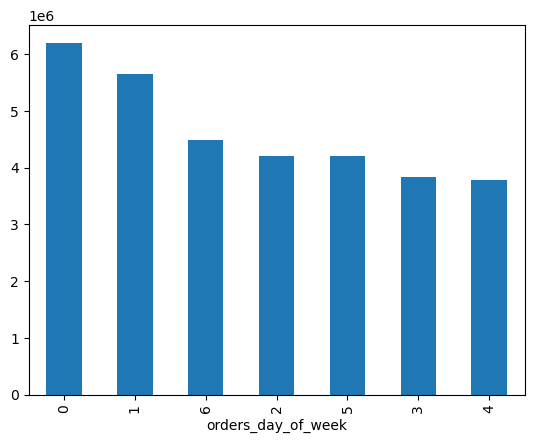

In [5]:
# Create bar chart for orders_day_of_week

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

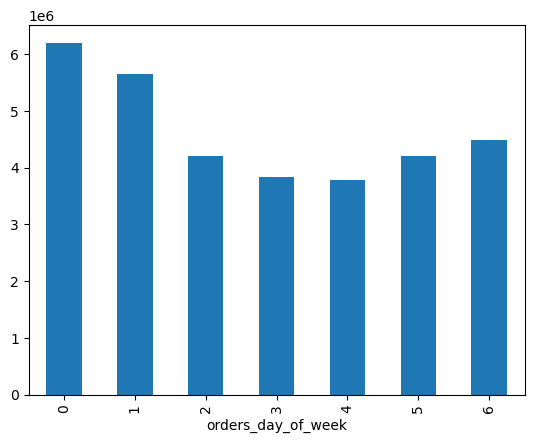

In [7]:
# Function to order categories by order of the week (instead of smallest to biggest) using sort index

bar=ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
#Print frequencies

ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [9]:
#Print frequencies using sort index to sort day of week (instead of smallest to biggest)

ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

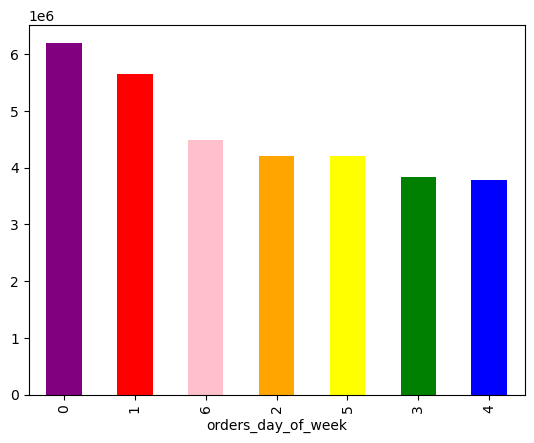

In [11]:
#Adding colours to bar chart in plot.bar function

bar=ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

## 0.4 Exporting Bar Charts

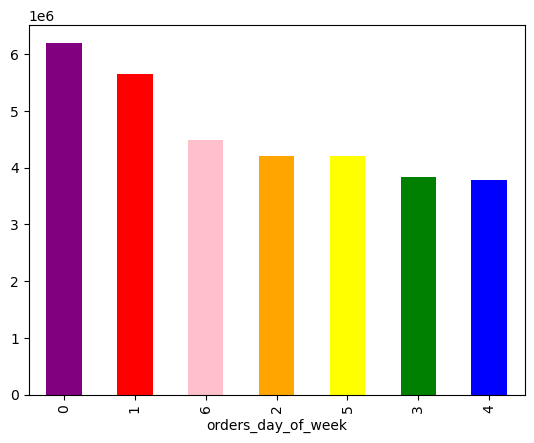

In [13]:
#Command to save chart to Jupyter's memory
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [15]:
#Export outside Jupyter in form of an image

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

## 0.5 Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

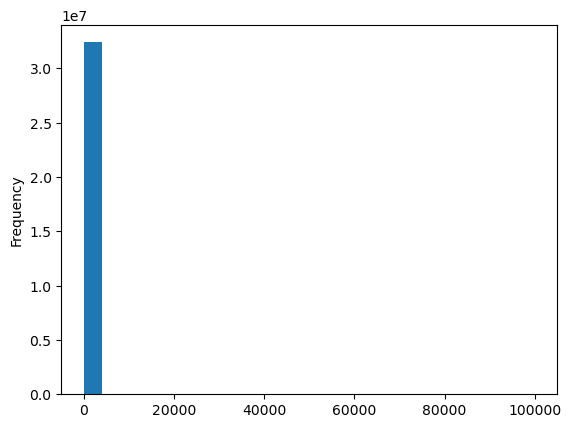

In [16]:
#Create histogram of prices column

ords_prods_merge['prices'].plot.hist(bins = 25)

In [17]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

#### Investigate maximum value

In [18]:
ords_prods_merge['prices'].mean()

11.980225638383468

In [19]:
ords_prods_merge['prices'].median()

7.4

In [20]:
ords_prods_merge['prices'].max()

99999.0

#### The max value of 99,999.00 is what's breaking the histogram

<Axes: xlabel='prices', ylabel='prices'>

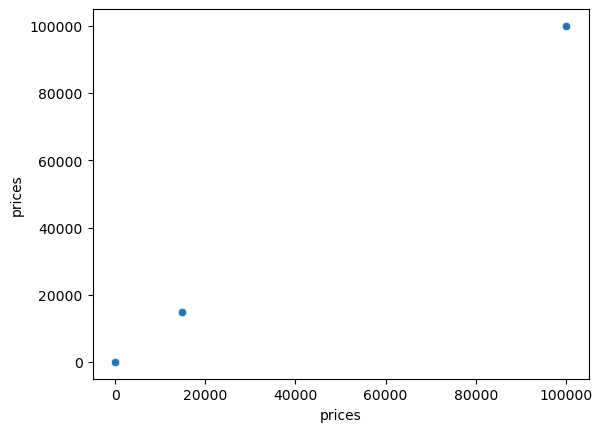

In [8]:
# Create a Scatterplot for exploratory analysis of prices and to spot outliers

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [9]:
# determine whether there are any values above a certain threshold in your data, over 100

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High_spender,23.0,Non_frequent_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High_spender,4.0,Frequent Customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High_spender,4.0,Frequent Customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High_spender,5.0,Frequent Customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High_spender,12.0,Regular customer


#### From the output, we can see there are 5,127 rows with outlier observations (higher than 100). For this task, we'll mark them as missing so they don't skew the data.

In [10]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [11]:
#check the prices again
ords_prods_merge['prices'].max()

25.0

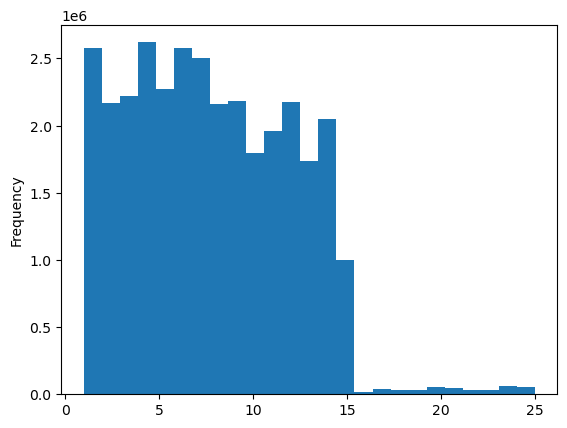

In [12]:
#retry histogram

hist=ords_prods_merge['prices'].plot.hist(bins =25)

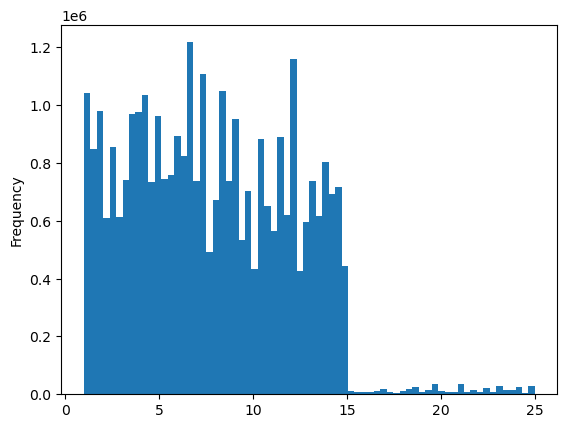

In [13]:
#Increase level of granularity

hist=ords_prods_merge['prices'].plot.hist(bins =70)

In [14]:
#Export histogram outside Jupyter in form of an image

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_orders_dow.png'))

## 0.6 Creating Line charts

#### To avoid using too much power and plotting the entire dataset on a line chart, or using eg. the top 200000, we use sampling instead.

### Create random samples

In [15]:
# Create sample with 70/30 split; the 30 percent sample would statistically resemble the 70 percent sample but contain less rows.

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [16]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [18]:
#Store / split dev into the samples of 70 big 

big = ords_prods_merge[dev]

In [19]:
#Store / split dev into the samples of 30 small

small = ords_prods_merge[~dev]

In [21]:
#Using len( ) function
len(ords_prods_merge)

32404859

In [22]:
len(big) + len(small)

32404859

In [23]:
#reducing the columns to only those necessary for the chart, prices and orders_day_of_week

df_2 = small[['orders_day_of_week','prices']]

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


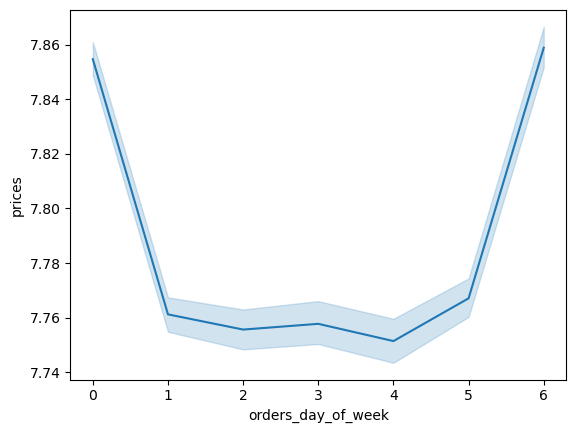

In [25]:
#Create line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [29]:
#Exporting the line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_dow.png'))

# Task part two Q. 3

In [5]:
# Import ord_prods_cust dataset from 4.9 part one

df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data ', 'Prepared Data', 'ords_prods_cust.pkl'))

### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

<Axes: ylabel='Frequency'>

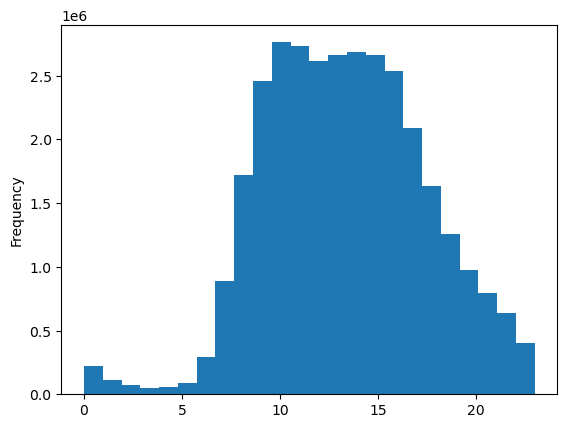

In [6]:
# Create histogram of order_hour_of_day column

df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram clearly shows how the highest activity for orders being placed during the day is from between 8am to 6pm. And there are very small amounts placed from 10pm to 5am.

# Task part two Q. 4

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

<Axes: xlabel='loyalty_flag'>

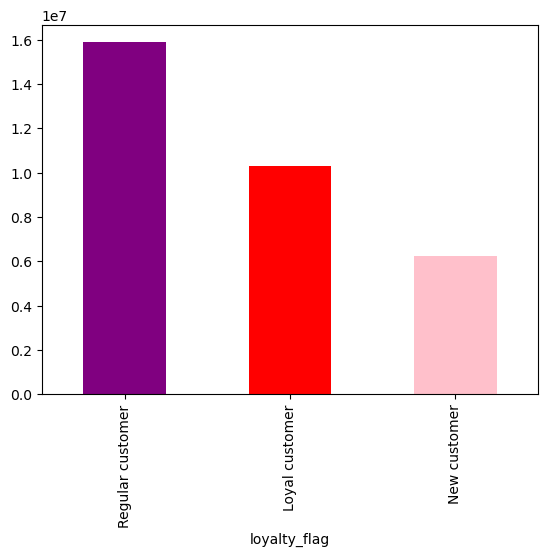

In [8]:
# Create a loyalty_flag bar chart

df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color =['purple', 'red', 'pink',])

# Task part two Q. 5

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [9]:
#Creating sample 70 30 from df_ords_prods_cust

np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [11]:
# Check dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [13]:
#Store 70% of the sample in the dataframe big

big2 = big = df_ords_prods_cust[dev]

In [14]:
#Store 30% of the sample in the dataframe small

small2 = df_ords_prods_cust[~dev]

In [15]:
len(df_ords_prods_cust)

32404859

In [16]:
len(big2) + len(small2)

32404859

In [17]:
#Create new dataframe using prices and order hour of day columns to save on space

df_3=small2[['order_hour_of_day','prices']]

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


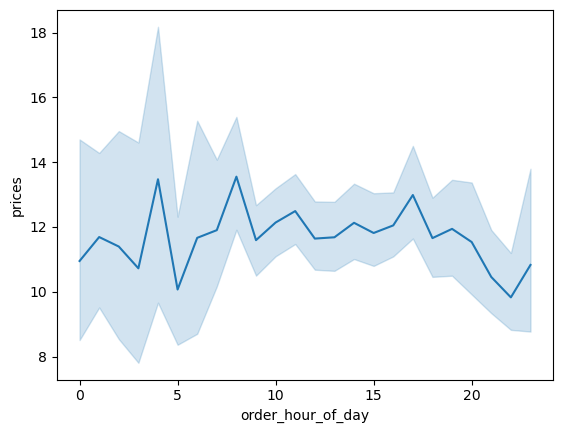

In [18]:
#Create Line Chart for the 30% sample

line_order_hour_of_day=sns.lineplot(data=df_3, x='order_hour_of_day', y='prices')

In [19]:
#Exporting the line chart

line_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_hod.png'))

# Task part two Q. 6

### First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

In [21]:
# Create new dataframe using dependants and age columns to save on space

df_4=small2[['dependants', 'Age']]

/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


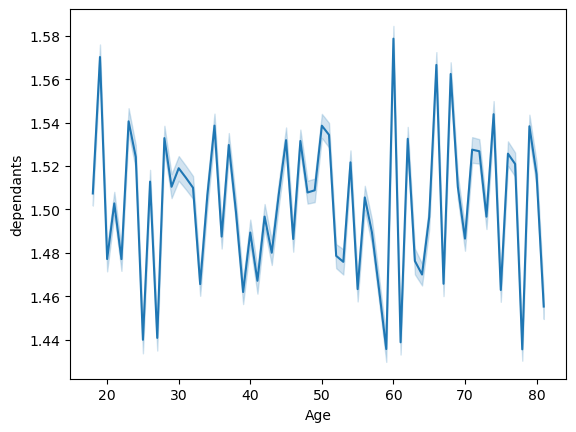

In [22]:
# Create Line Chart for the 30% sample age and dependants

line_dependants=sns.lineplot(data=df_4, x='Age', y='dependants')

In [24]:
# Exporting the line chart

line_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_age_dependants.png'))

#### Looking at the line chart above, we can see there is no correlation between age and number of dependants in customers. 

# Task part two Q. 7

### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

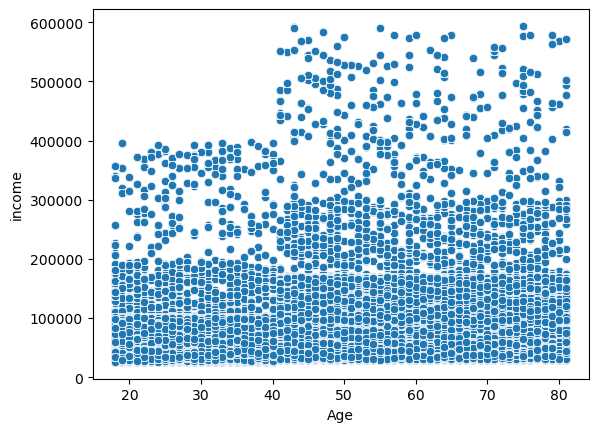

In [25]:
# Create scatterplot looking at age and income
 
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_ords_prods_cust)

In [26]:
# Exporting the scatterplot

scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatter_age_income.png'))

#### The scatterplot is very busy and hard to read, however it does indicate that the highest income concentration across all ages is between 0.00-200,000, followed by 200,000-300,000 for those over 40. It also shows that the higher numbers or 5-600,000 are only reached by those 40 or over.